In [23]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Dark2_7
%matplotlib inline

In [2]:
# read interpolated seven even-spaced speleothem d18O timeseries
# (of last 2k) and corresponding ages
with open('speleo_2k.pickle', 'rb') as handle:
    speleo_2k = pickle.load(handle)

In [3]:
age = speleo_2k['age']
d18O = speleo_2k['d18O']

In [16]:
d18O

{'Dongge': array([-7.18      , -7.25777778, -7.298     , -7.188     , -7.11636364,
        -7.19818182, -7.28      , -7.27545455, -7.27090909, -7.47      ,
        -7.53      , -8.07      , -8.12      , -7.97714286, -7.73125   ,
        -7.5875    , -7.52      , -7.6425    , -7.66      , -7.49      ,
        -7.71      , -7.97      , -7.6975    , -7.56      , -7.97      ,
        -7.68      , -7.5875    , -7.8725    , -7.595     , -7.51      ,
        -7.7575    , -7.83666667, -7.72      , -7.56      , -7.5625    ,
        -7.635     , -7.6       , -7.71      , -7.60333333, -7.91666667,
        -7.57      , -7.76333333, -7.415     , -7.65      , -7.53      ,
        -7.62666667, -7.78333333, -7.19      , -7.51666667, -7.50666667,
        -7.57      , -7.11      , -7.635     , -7.51333333, -7.66      ,
        -7.19      , -7.29333333, -7.16      , -7.205     , -7.25      ,
        -7.436     , -7.3175    , -7.44      , -7.56      , -7.515     ,
        -7.278     , -7.2975    , -7.49  

In [25]:
# A function for standardize a time series
def standardize(x):
    if np.any(np.isnan(x)):
        x_ex = x[np.logical_not(np.isnan(x))]
        xm = np.mean(x_ex)
        xs = np.std(x_ex,ddof=1)
    else:
        xm = np.mean(x)
        xs = np.std(x,ddof=1)
    xstd = (x - xm)/xs
    return xstd

In [34]:
# put all seven time series into one matrix
# The matrix has the dimension of
# (length of time series) x (number of sites)
# and at the same time standardize each time series

# Also, we save the names of sites to "sites"
d18O_all=[]
sites=[]
for site in d18O.keys():
    sites.append(site)
    d18O_all.append(standardize(d18O[site]))

comp = np.transpose(np.asarray(d18O_all))

comp.shape

(410, 7)

Text(-0.11, 0.5, 'Speleothem $\\delta^{18}$O (‰)')

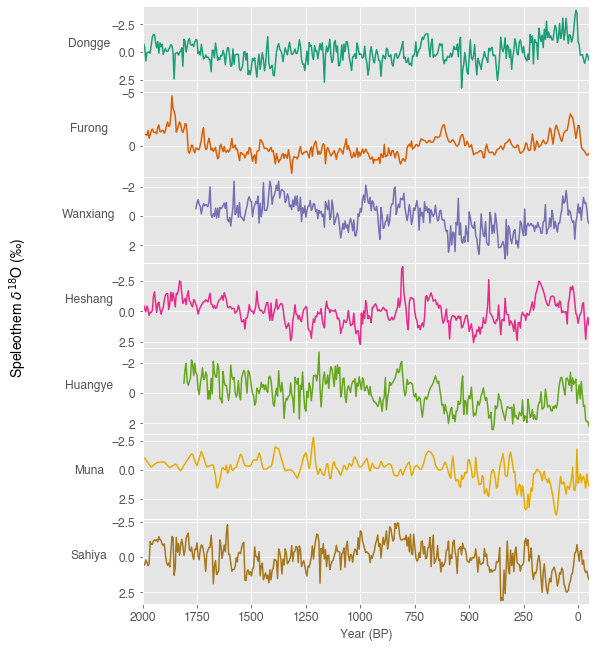

In [46]:
# Plot all time series
fig, axs = plt.subplots(7, 1, figsize=(8, 11),sharex=True)
fig.subplots_adjust(hspace=0.001)

for i in range(7):
    axs[i].plot(age['Heshang'],comp[:,i],color=Dark2_7.mpl_colors[i])
    axs[i].set_xlabel('Year (BP)')
    axs[i].set_ylabel(sites[i],rotation=0,fontsize=12)
    axs[i].set_xlim(-50,2000)
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].invert_xaxis()
    axs[i].invert_yaxis()
    axs[i].yaxis.set_label_coords(-0.12, 0.5)
fig.text(-0.11, 0.5, u'Speleothem $\delta^{18}$O (\u2030)', va='center', rotation='vertical',fontsize=14)

In [18]:
# load MSSA functions
from mssa import *

In [27]:
# setting window size 1/10 of the data length
deval,eig_vec,q95,q05,PC,RC = mssa(comp,41)

/Users/hujun/.pyenv/versions/anaconda3-5.0.1/envs/py3.6/lib/python3.6/site-packages/nitime/utils.py:980: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, np.complex) or
/Users/hujun/.pyenv/versions/anaconda3-5.0.1/envs/py3.6/lib/python3.6/site-packages/nitime/utils.py:981: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, np.complex))


Text(0.5, 0, 'Rank')

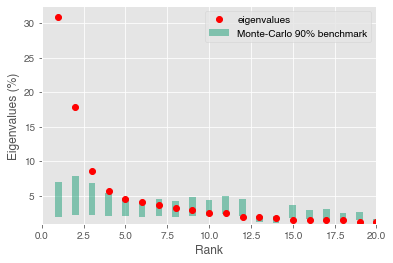

In [28]:
# Plot the first 20 eigenvalues (in percent)
plt.style.use('ggplot')

sig_perc = deval[0:20]/sum(deval[0:20])*100
sigma_q05 = q05[0:20]/sum(deval[0:20])*100
sigma_q95 = q95[0:20]/sum(deval[0:20])*100

plt.bar(np.array(range(1,21)), height=sigma_q95-sigma_q05, width=0.4, bottom = sigma_q05, color=Dark2_7.mpl_colors[0],label='Monte-Carlo 90% benchmark',alpha=0.5)
plt.plot(range(1,21),sig_perc,'ro',label='eigenvalues')
plt.legend()
plt.xlim(0,20)
plt.ylabel('Eigenvalues (%)')
plt.xlabel('Rank')
#plt.savefig('eig_percent.pdf',dpi=300)

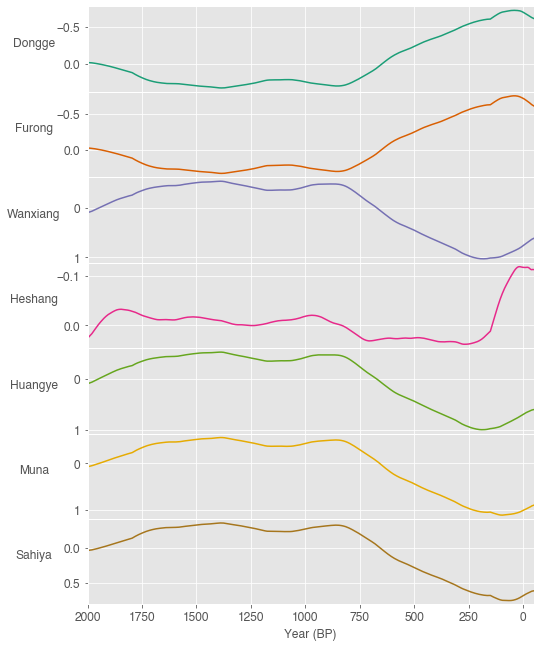

In [53]:
# Plot the first mode (using RC)
# The shape of RC: 
# (number of time series) x (length of time series) x (number of modes)

fig, axs = plt.subplots(7, 1, figsize=(8, 11),sharex=True)
fig.subplots_adjust(hspace=0.001)

for i in range(7):
    axs[i].plot(age['Heshang'],RC[i,:,0],color=Dark2_7.mpl_colors[i])
    axs[i].set_xlabel('Year (BP)')
    axs[i].set_ylabel(sites[i],rotation=0,fontsize=12)
    axs[i].set_xlim(-50,2000)
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].invert_xaxis()
    axs[i].invert_yaxis()
    axs[i].yaxis.set_label_coords(-0.12, 0.5)
#fig.text(-0.11, 0.5, u'Speleothem $\delta^{18}$O (\u2030)', va='center', rotation='vertical',fontsize=14)

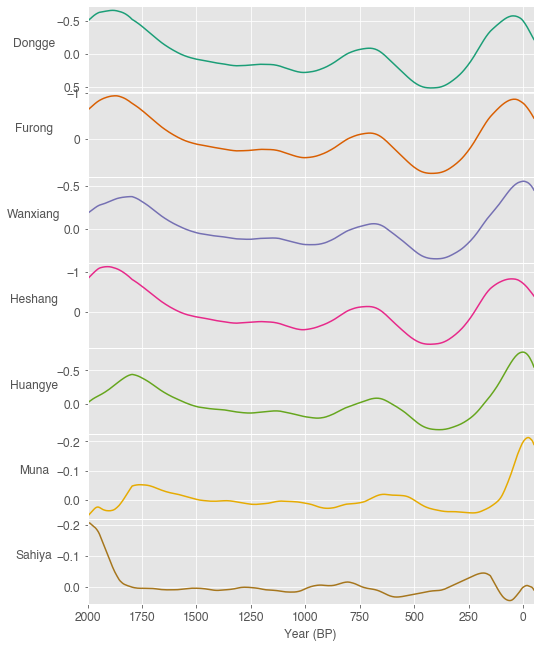

In [54]:
# Plot the second mode

fig, axs = plt.subplots(7, 1, figsize=(8, 11),sharex=True)
fig.subplots_adjust(hspace=0.001)

for i in range(7):
    axs[i].plot(age['Heshang'],RC[i,:,1],color=Dark2_7.mpl_colors[i])
    axs[i].set_xlabel('Year (BP)')
    axs[i].set_ylabel(sites[i],rotation=0,fontsize=12)
    axs[i].set_xlim(-50,2000)
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].invert_xaxis()
    axs[i].invert_yaxis()
    axs[i].yaxis.set_label_coords(-0.12, 0.5)
#fig.text(-0.11, 0.5, u'Speleothem $\delta^{18}$O (\u2030)', va='center', rotation='vertical',fontsize=14)

Text(-0.11, 0.5, 'Speleothem $\\delta^{18}$O (‰)')

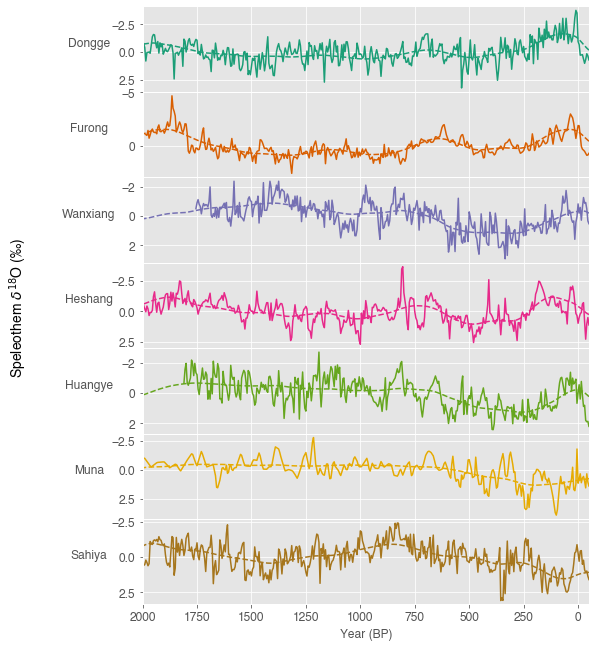

In [52]:
# Plot the sum of the four modes (dashed lines) overlaping the original time series

fig, axs = plt.subplots(7, 1, figsize=(8, 11),sharex=True)
fig.subplots_adjust(hspace=0.001)

for i in range(7):
    axs[i].plot(age['Heshang'],comp[:,i],color=Dark2_7.mpl_colors[i])
    axs[i].plot(age['Heshang'],np.sum(RC[i,:,0:4],axis=1),color=Dark2_7.mpl_colors[i],linestyle='dashed')
    axs[i].set_xlabel('Year (BP)')
    axs[i].set_ylabel(sites[i],rotation=0,fontsize=12)
    axs[i].set_xlim(-50,2000)
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].invert_xaxis()
    axs[i].invert_yaxis()
    axs[i].yaxis.set_label_coords(-0.12, 0.5)
fig.text(-0.11, 0.5, u'Speleothem $\delta^{18}$O (\u2030)', va='center', rotation='vertical',fontsize=14)